<a href="https://colab.research.google.com/github/ratnesh003/college-common-1/blob/main/AI%20Assignments/assignment5Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

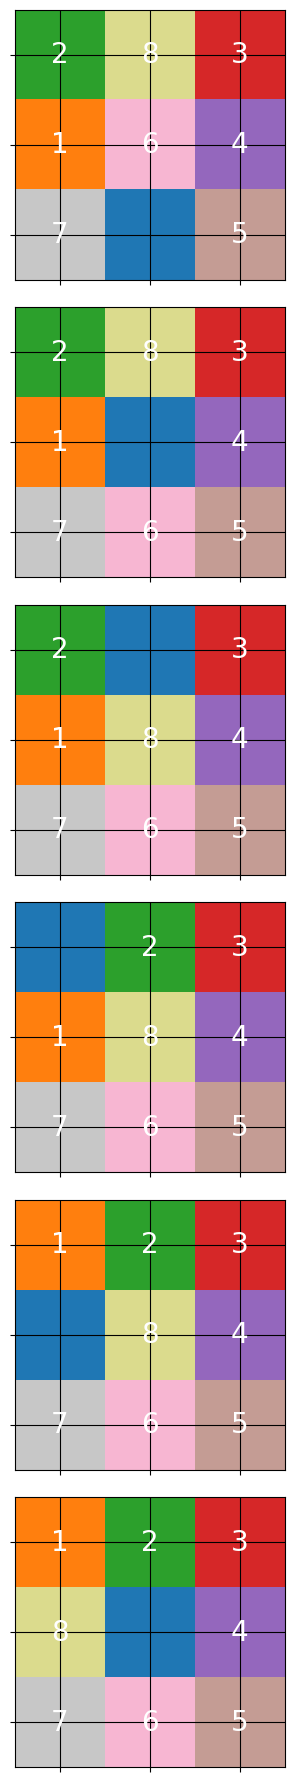

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from queue import Queue

def visualize_puzzle(path):
    """Function to visualize the path of the 8-puzzle solution."""
    fig, axes = plt.subplots(nrows=len(path), ncols=1, figsize=(3, 3 * len(path)))
    if len(path) == 1:
        axes = [axes]
    for ax, state in zip(axes, path):
        ax.imshow(state, cmap='tab20', vmin=0, vmax=9)
        ax.set_xticks(np.arange(3))
        ax.set_yticks(np.arange(3))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        for i in range(3):
            for j in range(3):
                ax.text(j, i, state[i, j] if state[i, j] != 0 else '',
                        ha='center', va='center', color='white', fontsize=20)
        ax.grid(color='black')
    plt.tight_layout()
    plt.show()

def bfs_solve(initial_state, goal_state):
    """Solves the 8-puzzle using Breadth-First Search (BFS)."""
    queue = Queue()
    queue.put((initial_state, [initial_state]))
    visited = set()
    visited.add(tuple(initial_state.reshape(-1)))

    while not queue.empty():
        current_state, path = queue.get()
        if np.array_equal(current_state, goal_state):
            return path

        zero_pos = tuple(np.argwhere(current_state == 0)[0])
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
        for move in moves:
            new_pos = (zero_pos[0] + move[0], zero_pos[1] + move[1])
            if 0 <= new_pos[0] < 3 and 0 <= new_pos[1] < 3:
                new_state = np.copy(current_state)
                new_state[zero_pos], new_state[new_pos] = new_state[new_pos], new_state[zero_pos]
                new_state_tuple = tuple(new_state.reshape(-1))
                if new_state_tuple not in visited:
                    visited.add(new_state_tuple)
                    queue.put((new_state, path + [new_state]))

    return None  # If no solution

# Initial configuration and goal configuration
initial_state = np.array([[2, 8, 3], [1, 6, 4], [7, 0, 5]])
goal_state = np.array([[1, 2, 3], [8, 0, 4], [7, 6, 5]])

# Solve the puzzle
solution_path = bfs_solve(initial_state, goal_state)

# Solve the puzzle
solution_path = bfs_solve(initial_state, goal_state)

# Visualize the solution path
if solution_path:
    visualize_puzzle(solution_path)
else:
    print("No solution found.")
